In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

In [3]:
vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)

# from the term-document matrix, create the BoW matrix
print(X.toarray())

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


In [4]:
# how do we get unique words
# Get the unique words
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


In [16]:
# new example, new corpus
sentences2 = [
    "Data Science is the best.",
    "Data Science has cool topics.",
    "Are these the best topics?",
    "Is Data Science the best track?"
]

# make the model
vectorizer2 = CountVectorizer()

X2 = vectorizer2.fit_transform(sentences2)

# print the Bow matrix
print(X2.toarray())


# verify 4 x 11 shape
print(X2.toarray().shape)

# get the unique words
print(vectorizer2.get_feature_names())

[[0 1 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 0 0 1]]
(4, 11)
['are', 'best', 'cool', 'data', 'has', 'is', 'science', 'the', 'these', 'topics', 'track']


In [18]:

from figures import plot_kmeans_interactive

plot_kmeans_interactive()

ModuleNotFoundError: No module named 'figures'

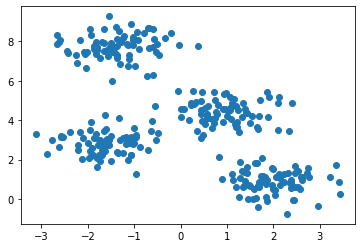

In [19]:
# generating a dataset of random samples
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

# plot the data
plt.scatter(X[:, 0], X[:, 1])

In [20]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)  # this tells the points to arrange in 4 clusters
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)  # now the random points should be in the centers of their own clusters

[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]]


In [30]:
# square the difference of x coordinates, do same for y, add together and take sqrt, abs value is answer
import numpy as np
def distance_between_points(a):
    # x_diff = b[0] - a[0]
   #  y_diff = b[1] - a[1]
    
    return np.linalg.norm(a)


# distance_between_points(np.array([[1, 1]-[2, 2]]))
u = np.array([1, 1])
v = np.array([2, 2])
w = np.array([3, 8])
ab = np.linalg.norm(u-v)
ac = np.linalg.norm(u-w)

In [31]:
ab

1.4142135623730951

In [32]:
ac

7.280109889280518

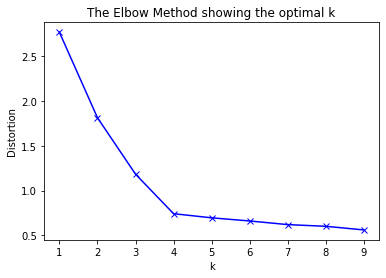

In [33]:
# how to plot distortion, so we can get to the optimal value for K
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

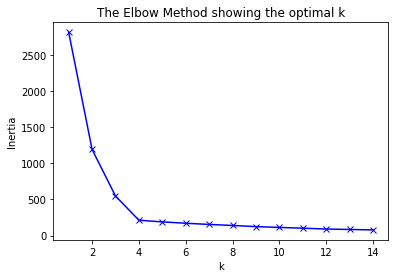

In [34]:
# do the same thing with the intertia property
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

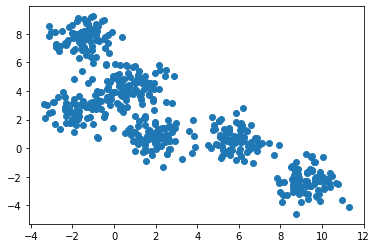

In [39]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y = make_blobs(n_samples=500, centers=6,
                          random_state=0, cluster_std=0.80)

# plot the data
plt.scatter(Data[:, 0], Data[:, 1])

In [68]:
# km[km.cluster == 3]
# cluster_map['data_index'] = Data.index.values
# cluster_map['cluster'] = km.labels_
km = KMeans(n_clusters=6).fit(Data)
# cluster_map = {}
# cluster_map['data_index'] = Data
# cluster_map['cluster'] = km.labels_
km.labels_

array([3, 2, 5, 1, 5, 0, 0, 4, 2, 0, 3, 5, 4, 0, 4, 4, 3, 3, 2, 0, 1, 4,
       5, 1, 5, 4, 5, 0, 3, 2, 1, 5, 4, 4, 2, 0, 3, 2, 2, 4, 1, 3, 2, 0,
       3, 2, 1, 3, 1, 2, 3, 2, 5, 2, 4, 2, 0, 0, 1, 2, 5, 1, 3, 2, 4, 2,
       0, 2, 2, 0, 2, 0, 4, 5, 0, 0, 3, 4, 3, 3, 1, 1, 3, 1, 0, 4, 4, 3,
       0, 1, 4, 4, 5, 1, 0, 1, 5, 5, 0, 3, 5, 5, 4, 2, 2, 0, 5, 3, 3, 1,
       1, 0, 2, 4, 1, 2, 2, 1, 3, 3, 0, 2, 5, 3, 0, 4, 0, 0, 4, 3, 2, 1,
       1, 4, 2, 4, 3, 0, 1, 1, 1, 4, 0, 2, 3, 3, 0, 2, 1, 5, 5, 1, 4, 4,
       0, 3, 0, 0, 2, 4, 4, 3, 3, 0, 1, 5, 4, 2, 2, 0, 2, 3, 5, 5, 2, 1,
       5, 1, 3, 5, 1, 4, 5, 2, 5, 3, 1, 4, 3, 2, 2, 3, 1, 5, 0, 5, 5, 0,
       3, 3, 1, 1, 1, 2, 5, 4, 3, 3, 2, 5, 1, 0, 4, 1, 3, 4, 3, 0, 3, 5,
       2, 1, 4, 0, 5, 5, 1, 1, 4, 0, 5, 3, 5, 2, 1, 4, 3, 3, 0, 3, 1, 3,
       4, 2, 4, 5, 1, 2, 2, 1, 3, 0, 4, 1, 4, 4, 2, 4, 5, 4, 5, 3, 5, 5,
       5, 2, 4, 0, 2, 0, 0, 4, 4, 5, 0, 2, 3, 0, 5, 0, 1, 3, 5, 2, 2, 0,
       4, 0, 5, 0, 3, 3, 0, 2, 4, 4, 2, 1, 3, 4, 5,

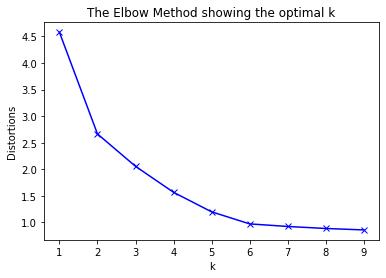

In [46]:
distortions = []
K = range(1, 10)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(Data)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(Data, km.cluster_centers_, 'euclidean'), axis=1)) / Data.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method showing the optimal k')
plt.show()

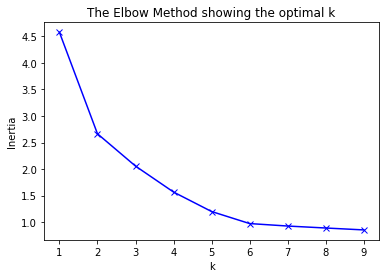

In [45]:
inertia_values = []
K = range(1, 10)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(Data)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    inertia_values.append(sum(np.min(distance.cdist(Data, km.cluster_centers_, 'euclidean'), axis=1)) / Data.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, inertia_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [78]:
vectorizer = CountVectorizer(stop_words='english')


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

# make BOW
bow = vectorizer.fit_transform(sentences)
# Get the unique words
print(vectorizer.get_feature_names())

km = KMeans(n_clusters=2).fit(bow)

km.labels_

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']


array([1, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

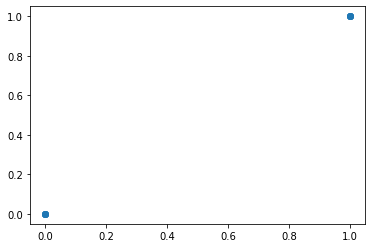

In [73]:
plt.scatter(km.labels_, km.labels_)

In [77]:
km.cluster_centers_.T

array([[0.  , 0.25],
       [0.  , 0.25],
       [0.25, 0.  ],
       [0.5 , 0.  ],
       [0.25, 0.  ],
       [0.5 , 0.  ],
       [0.  , 0.25],
       [0.25, 0.  ],
       [0.25, 0.  ],
       [0.  , 0.25],
       [0.  , 0.25],
       [0.  , 0.25],
       [0.  , 1.  ],
       [0.  , 0.25],
       [0.  , 0.25],
       [0.  , 0.25],
       [0.25, 0.  ],
       [0.25, 0.  ],
       [0.25, 0.  ],
       [0.  , 0.25],
       [0.25, 0.  ],
       [0.25, 0.  ],
       [0.  , 0.25],
       [0.25, 0.  ],
       [0.25, 0.  ],
       [0.  , 0.25],
       [0.25, 0.  ],
       [0.  , 0.25],
       [0.25, 0.  ],
       [0.  , 0.25],
       [0.25, 0.  ],
       [0.  , 0.25],
       [0.25, 0.  ]])

In [79]:
km.predict(bow)

array([1, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

In [82]:
sentence = ["my cat is hungry"]
v1 = vectorizer.transform(sentence)

In [83]:
v1

<1x33 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [84]:
v1.toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [85]:
km.predict(v1)

array([1], dtype=int32)

In [86]:
# combining bag of words and kmeans clustering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

# remove stop words from sentences (and, or, is, ...) and instantiate the Bag-of-Word 
vectorizer = CountVectorizer(stop_words='english')
# transform sentences into numerical arrays 
X = vectorizer.fit_transform(sentences)
# print unique words (vocabulary)
print(vectorizer.get_feature_names())
print(X.shape)
# We know there are two group of sentences -> Group 1: cats | Group 2: Google
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)

# Testing our model: For a new sentence, let's see how the model will cluster it. 

# first we should convert the sentence to a numerical array
Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)
# Let's do the same for another sentence
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
# Lets see the model prediction for training docs
print(model.predict(X))

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
[1]
[0]
[0 0 1 1 0 0 1 1]
